In [89]:
from sklearn.datasets import load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import warnings
warnings.simplefilter('ignore')

In [18]:
columns = data.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [34]:
data= load_boston()
predictors = data.feature_names
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [52]:
boston = pd.DataFrame(data=data.data, columns=predictors) #without the target

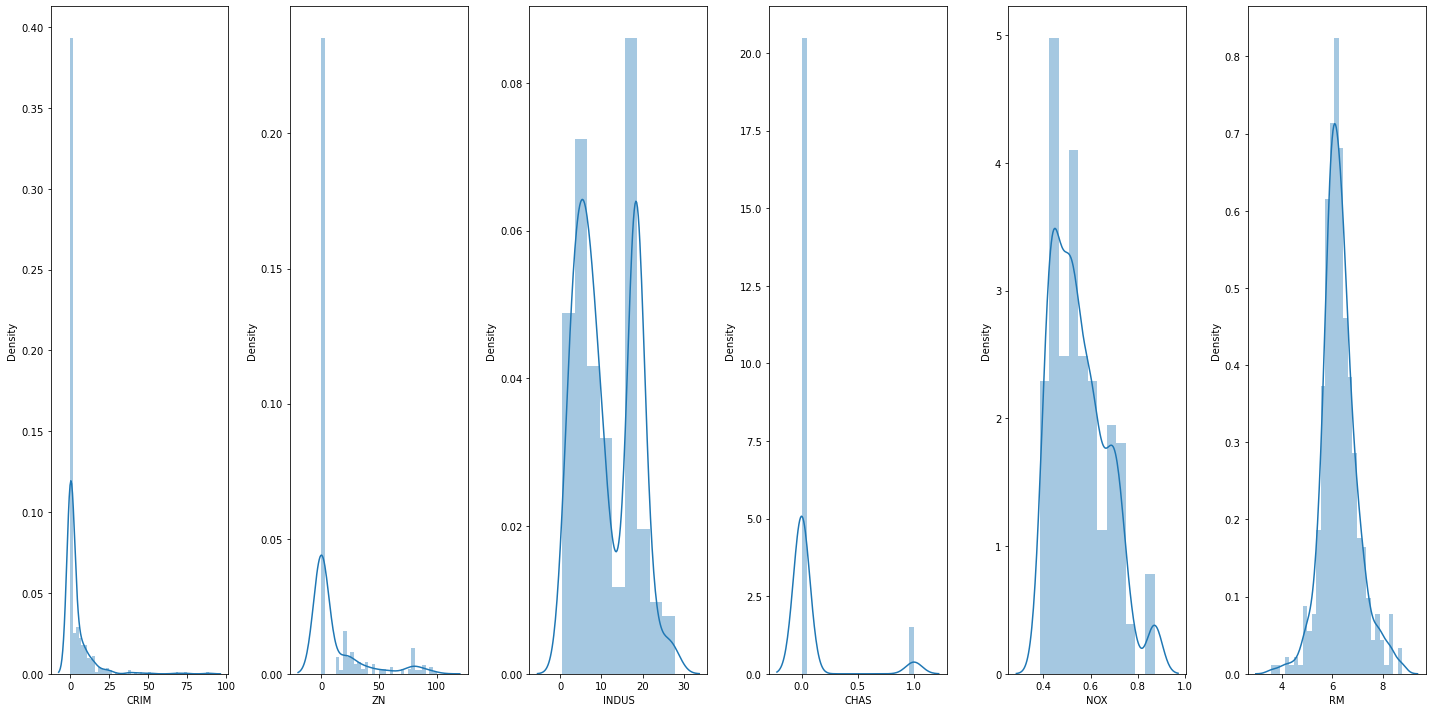

In [46]:
_, axes = plt.subplots(1, len(predictors)//2 , figsize=(20,10))
for i, predictor in enumerate(predictors[:len(predictors)//2]):
    sns.distplot(boston[predictor], ax=axes[i])
plt.tight_layout()

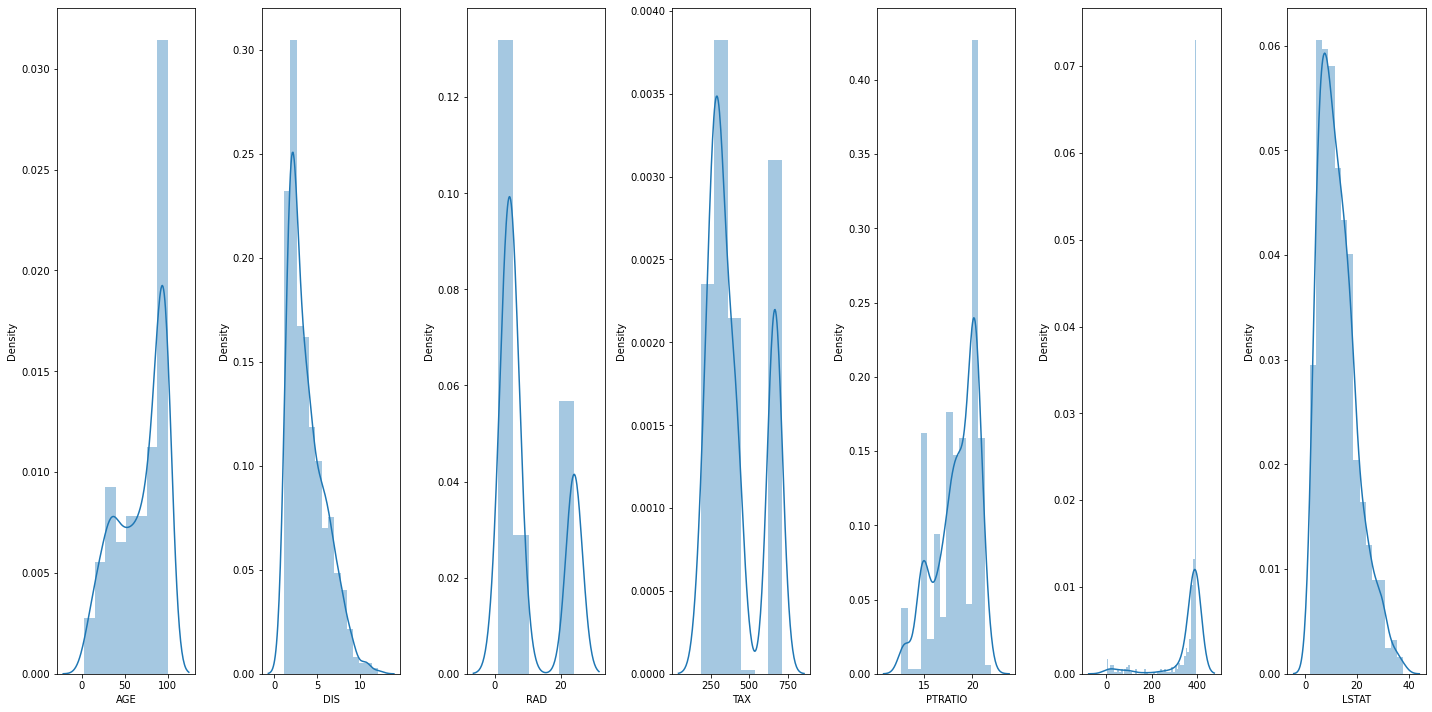

In [47]:
_, axes = plt.subplots(1, len(predictors)//2+1 , figsize=(20,10))
for i, predictor in enumerate(predictors[len(predictors)//2:]):
    sns.distplot(boston[predictor], ax=axes[i])
plt.tight_layout()

In [ ]:
So we can see that CHAS is a categorical variable. We must take that into account in our model.

In [53]:
cor = boston.corr()
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


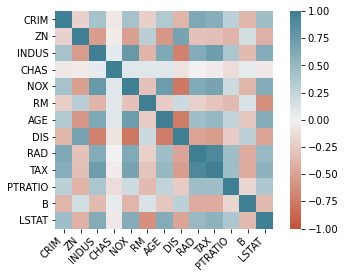

In [25]:
# Investigate the data
ax = sns.heatmap(cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [71]:
truncated_cor = np.where(np.abs(cor)>0.7 ,cor,0)
truncated_cor = pd.DataFrame(truncated_cor, columns=predictors, index=predictors)
truncated_cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
ZN,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
INDUS,0.0,0.0,1.000000,0.0,0.763651,0.0,0.000000,-0.708027,0.000000,0.720760,0.0,0.0,0.0
CHAS,0.0,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
NOX,0.0,0.0,0.763651,0.0,1.000000,0.0,0.731470,-0.769230,0.000000,0.000000,0.0,0.0,0.0
RM,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
AGE,0.0,0.0,0.000000,0.0,0.731470,0.0,1.000000,-0.747881,0.000000,0.000000,0.0,0.0,0.0
DIS,0.0,0.0,-0.708027,0.0,-0.769230,0.0,-0.747881,1.000000,0.000000,0.000000,0.0,0.0,0.0
RAD,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.910228,0.0,0.0,0.0
TAX,0.0,0.0,0.720760,0.0,0.000000,0.0,0.000000,0.000000,0.910228,1.000000,0.0,0.0,0.0


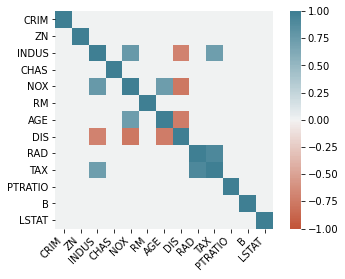

In [59]:
ax = sns.heatmap(truncated_cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [36]:
predictors

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [41]:
boston['MEDV'] = data.target

In [37]:
formula_1 = 'MEDV ~ '
for item in predictors:
    formula_1 = formula_1 + f' + {item}'
formula_1

'MEDV ~ + CRIM+ ZN+ INDUS+ CHAS+ NOX+ RM+ AGE+ DIS+ RAD+ TAX+ PTRATIO+ B+ LSTAT'

In [43]:
model_1 = smf.ols(formula=formula_1, data=boston).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        20:18:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
boston['MEDV'] = data.target

formula_2 = 'MEDV ~ + CRIM+ ZN+  C(CHAS)+ NOX+ DIS+ RM+ RAD+ TAX+ PTRATIO+ B+ LSTAT'
model_2 = smf.ols(formula=formula_2, data=boston).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          5.54e-137
Time:                        20:43:18   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RM             3.8016      0.406      9.356      0.000       3.003       4.600
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
reduced_boston = boston[['CRIM','ZN','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']].corr()
reduced_boston

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,-0.055892,0.420972,-0.219247,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.042697,-0.516604,0.311991,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
CHAS,-0.055892,-0.042697,1.000000,0.091203,0.091251,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.091203,1.000000,-0.302188,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,0.091251,-0.302188,1.000000,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
DIS,-0.379670,0.664408,-0.099176,-0.769230,0.205246,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,-0.007368,0.611441,-0.209847,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,-0.035587,0.668023,-0.292048,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993
PTRATIO,0.289946,-0.391679,-0.121515,0.188933,-0.355501,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044
B,-0.385064,0.175520,0.048788,-0.380051,0.128069,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087


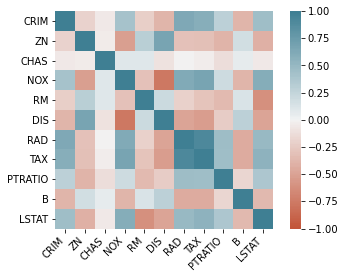

In [68]:
ax = sns.heatmap(reduced_boston, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [90]:
formula_3 = 'MEDV ~ DIS+ C(CHAS) + NOX+ RM+ B+ PTRATIO+ LSTAT'
model_3 = smf.ols(formula=formula_3, data=boston).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     184.9
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          4.26e-134
Time:                        20:57:44   Log-Likelihood:                -1516.2
No. Observations:                 506   AIC:                             3048.
Df Residuals:                     498   BIC:                             3082.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4120      4.905      6.200      0.000      20.774      40.050
DIS           -1.1235      0.165     -6.804      0.000      -1.448      -0.799
CHAS           3.0519      0.876      3.484      0.001       1.331       4.773
NOX          -16.6771      3.252     -5.129      0.000     -23.066     -10.288
RM             4.2944      0.407     10.561      0.000       3.495       5.093
B              0.0090      0.003      3.384      0.001       0.004       0.014
PTRATIO       -0.9737      0.112     -8.701      0.000      -1.194      -0.754
LSTAT         -0.5372      0.048    -11.204      0.000      -0.631      -0.443
==============================================================================
Omnibus:                      188.282   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              920.901
Skew:                           1.578   Prob(JB):                    1.07e-200
Kurtosis:                       8.807   Cond. No.                     9.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

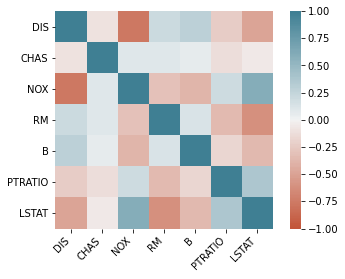

In [91]:
reduced_boston_2 = boston[['DIS','CHAS','NOX','RM','B','PTRATIO','LSTAT']].corr()

ax = sns.heatmap(reduced_boston_2, 
    vmin=-1, vmax=1, center=0,
    square=True,
    cmap=sns.diverging_palette(20, 220, n=200),
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [93]:
formula_4 = 'MEDV ~ C(CHAS)+ RM+ B+ PTRATIO+ LSTAT'
model_4 = smf.ols(formula=formula_4, data=boston).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          9.17e-127
Time:                        21:00:50   Log-Likelihood:                -1539.0
No. Observations:                 506   AIC:                             3090.
Df Residuals:                     500   BIC:                             3115.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8536      4.168      2.844      0.005       3.664      20.043
CHAS           3.3200      0.902      3.683      0.000       1.549       5.091
RM             4.6523      0.420     11.076      0.000       3.827       5.478
B              0.0101      0.003      3.743      0.000       0.005       0.015
PTRATIO       -0.8583      0.115     -7.432      0.000      -1.085      -0.631
LSTAT         -0.5181      0.044    -11.792      0.000      -0.604      -0.432
==============================================================================
Omnibus:                      205.836   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1116.216
Skew:                           1.709   Prob(JB):                    4.14e-243
Kurtosis:                       9.423   Cond. No.                     6.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
formula_5 = 'MEDV ~ C(CHAS)+ RM+ PTRATIO+ LSTAT'
model_5 = smf.ols(formula=formula_5, data=boston).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     275.5
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          5.11e-125
Time:                        21:02:21   Log-Likelihood:                -1546.0
No. Observations:                 506   AIC:                             3102.
Df Residuals:                     501   BIC:                             3123.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.1364      3.864      4.693      0.000      10.544      25.729
C(CHAS)[T.1.0]     3.4371      0.913      3.766      0.000       1.644       5.230
RM                 4.4264      0.421     10.513      0.000       3.599       5.254
PTRATIO           -0.8874      0.117     -7.604      0.000      -1.117      -0.658
LSTAT             -0.5755      0.042    -13.802      0.000      -0.657      -0.494
==============================================================================
Omnibus:                      182.152   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              845.597
Skew:                           1.539   Prob(JB):                    2.40e-184
Kurtosis:                       8.534   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""